<a href="https://www.kaggle.com/code/santhoshjakku/santhuzz-w3?scriptVersionId=257434760" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-train/titanic_train (1).csv


In [5]:
import pandas as pd

# Correct path (single / between directory and file)
df = pd.read_csv("/kaggle/input/titanic-train/titanic_train (1).csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

****Constant Features- checking if only one unique value is present in the cols..then remove them****

In [9]:
const_features = [col for col in df.columns if df[col].nunique() == 1]
print("\nConstant Features:", const_features)

df = df.drop(columns=const_features)


Constant Features: []


In [12]:
# 2️⃣ Quasi-Constant Features Removal
# (features where >98% of values are the same)
# ---------------------------
quasi_constant_features = []
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).max()  # highest frequency %
    if top_freq > 0.98:
        quasi_constant_features.append(col)

print("\nQuasi-Constant Features:", quasi_constant_features)
df = df.drop(columns=quasi_constant_features)


Quasi-Constant Features: []


In [13]:
# 3️⃣ Duplicated Features Removal
# ---------------------------
# Transpose df to find duplicate columns
duplicated_features = df.T[df.T.duplicated()].index.tolist()
print("\nDuplicated Features:", duplicated_features)

df = df.drop(columns=duplicated_features)


Duplicated Features: []


In [27]:
df.isnull().values.any()


False

In [15]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df.isnull().mean() * 100


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [18]:
df = df.dropna(axis=1, thresh=len(df) * 0.5)


In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].mean())     # Mean

In the Titanic dataset, the Embarked column tells us where a passenger boarded the ship:

C = Cherbourg

Q = Queenstown

S = Southampton

There are usually only 2 missing values in this column, so handling them is simple.



In [25]:


print(df['Embarked'].isnull().sum())
print(df['Embarked'].value_counts())


2
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


So now...we are filling those missing values with the most frequently ocuuring value

In [26]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [31]:

# Encode categorical variables before MI calculation
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Survived'])  # Features
y = df_encoded['Survived']                 # Target

# Calculate mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame of MI scores
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print(mi_df)


       Feature  MI Score
3          Sex  0.151115
8         Fare  0.144114
7       Ticket  0.113546
1       Pclass  0.095533
4          Age  0.030547
0  PassengerId  0.018049
5        SibSp  0.012438
6        Parch  0.008768
2         Name  0.000000
9     Embarked  0.000000


In [34]:
# Set threshold to remove the features based on their mi score
threshold = 0.01

# Get features to remove
low_mi_features = mi_df[mi_df['MI Score'] < threshold]['Feature'].tolist()

print("Features to remove:", low_mi_features)

# Drop them
X_reduced = X.drop(columns=low_mi_features)


Features to remove: ['Parch', 'Name', 'Embarked']


****While Mutual Information (MI) can detect any kind of relationship (linear or non-linear) between a feature and the target, Correlation measures only linear relationships between numeric variables.****

In [35]:
import pandas as pd

# Encode categorical vars for correlation calculation
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Correlation with target
target_corr = df_encoded.corr()['Survived'].sort_values(ascending=False)
print(target_corr)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Name          -0.057343
Age           -0.069809
Ticket        -0.164549
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


****2️⃣ Detecting Multicollinearity (Highly Correlated Features)
Two features that are highly correlated with each other can cause redundancy (multicollinearity) in models like Logistic Regression.****

In [36]:
corr_matrix = df_encoded.corr()

# Select features with correlation above threshold
threshold = 0.9
high_corr_pairs = [
    (col1, col2)
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold
]
print(high_corr_pairs)



[]


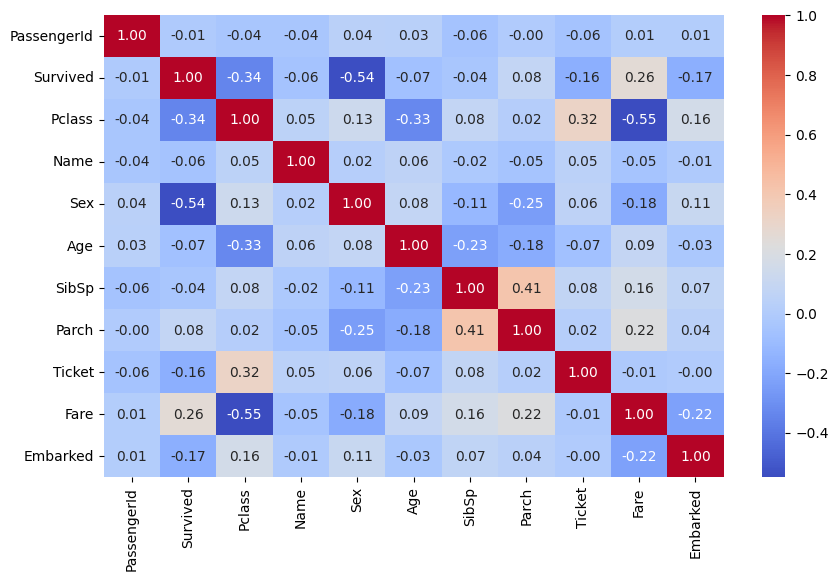

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [38]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Features (X) and target (y)
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

# Chi-square test
chi_scores, p_values = chi2(X, y)

# Put into DataFrame
chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_df)


       Feature   Chi2 Score       p-value
8         Fare  4518.319091  0.000000e+00
7       Ticket  2871.655466  0.000000e+00
2         Name   435.568915  9.973146e-97
3          Sex    92.702447  6.077838e-22
1       Pclass    30.873699  2.753786e-08
4          Age    24.687926  6.740514e-07
9     Embarked    10.202525  1.402485e-03
6        Parch    10.097499  1.484707e-03
0  PassengerId     3.312934  6.873667e-02
5        SibSp     2.581865  1.080942e-01


****In feature selection, ANOVA is used to see if a numerical feature is significantly different across different categories of the target variable.

If a feature’s mean varies a lot between classes → it’s likely important.

If a feature’s mean is almost the same for all classes → it might not be useful for classification.

2️⃣ When to Use ANOVA in Feature Selection
✅ Numerical Feature → Categorical Target
Example:

Feature: Fare (numerical)

Target: Survived (0 or 1)

❌ Don’t use ANOVA when:

Both variables are numerical → use correlation or regression tests

Both are categorical → use Chi-square****

In [41]:
from scipy.stats import f_oneway

# Group the 'Fare' values by Pclass
groups = [df['Fare'][df['Pclass'] == p] for p in df['Pclass'].unique()]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject Null Hypothesis → Significant difference between groups.")
else:
    print("Fail to Reject Null Hypothesis → No significant difference between groups.")

# We can conclude that as there will be a huge price diff bw the groups in fares(like 
 #   firstcalss,sec class etc...so it is diff factor in predicting the survival rate )

F-Statistic: 242.34415651744814
P-Value: 1.0313763209141171e-84
Reject Null Hypothesis → Significant difference between groups.


2. Grouping the data
python
Copy
Edit
groups = [df['Fare'][df['Pclass'] == p] for p in df['Pclass'].unique()]
Here’s what’s happening:

df['Pclass'].unique() → Gets all unique passenger classes in Titanic dataset (likely [1, 2, 3]).

For each passenger class (p), we filter df to get all Fare values belonging to that class:

Example:

For Pclass=1 → all Fares for 1st class passengers.

For Pclass=2 → all Fares for 2nd class passengers.

For Pclass=3 → all Fares for 3rd class passengers.

This creates a list of arrays:

python
Copy
Edit
[
   array_of_fares_for_class1,
   array_of_fares_for_class2,
   array_of_fares_for_class3
]
These will be fed into the ANOVA function.

3. Performing ANOVA
python
Copy
Edit
f_stat, p_val = f_oneway(*groups)
*groups unpacks the list into separate arguments for f_oneway:

Equivalent to:

python
Copy
Edit
f_oneway(group1, group2, group3)
What f_oneway does:

Calculates variance between groups (how far group means are from the overall mean).

Calculates variance within groups (how spread out values are inside each group).

Compares these variances to produce:

F-statistic → Ratio of between-group variance to within-group variance.

p-value → Probability of observing such a difference if the null hypothesis is true.

4. Printing Results